## 准备数据

创建随机的两组数据：

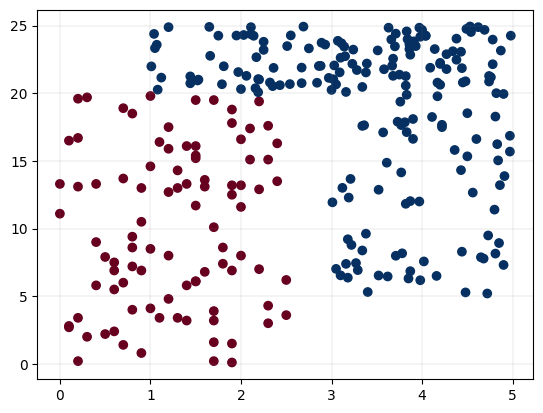

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def generate_random_dataset(size):
    """ Generate a random dataset and that follows a quadratic  distribution
    """
    x = []
    y = []
    target = []
    for i in range(size):
        # class zero
        x.append(np.round(random.uniform(0, 2.5), 1))
        y.append(np.round(random.uniform(0, 20), 1))
        target.append(0)
        # class one
        x.append(np.round(random.uniform(1, 5), 2))
        y.append(np.round(random.uniform(20, 25), 2))
        target.append(1)
        x.append(np.round(random.uniform(3, 5), 2))
        y.append(np.round(random.uniform(5, 25), 2))
        target.append(1)
    df_x = pd.DataFrame(data=x)
    df_y = pd.DataFrame(data=y)
    df_target = pd.DataFrame(data=target)
    data_frame = pd.concat([df_x, df_y], ignore_index=True, axis=1)
    data_frame = pd.concat([data_frame, df_target], ignore_index=True, axis=1)
    data_frame.columns = ['x', 'y', 'target']
    return data_frame

# Generate dataset
size = 100
dataset = generate_random_dataset(size)
features = dataset[['x', 'y']]
label = dataset['target']
# Hold out 20% of the dataset for testing
test_size = int(np.round(size * 0.2, 0))

# Split dataset into training and testing sets
x_train = features[:-test_size].values
y_train = label[:-test_size].values
x_test = features[-test_size:].values
y_test = label[-test_size:].values

# Plotting the training set
fig, ax = plt.subplots()
# adding major gridlines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap='RdBu')

## 训练模型

`sklearn`的SVM模型提供了多种可选择的核函数，以实现非线性支持向量机。这里我们采用多项式核函数：

In [2]:
from sklearn.svm import SVC

model = SVC(kernel='poly', degree=2)
model.fit(x_train, y_train)

SVC(degree=2, kernel='poly')

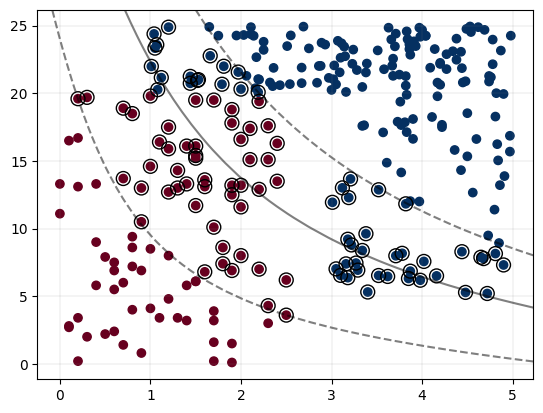

In [3]:
def plot_svc_decision_function(model, ax):
    """绘制2D SVC图像函数"""
    assert ax is not None
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # 创建网格来展示数据
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    # 超平面S在坐标(x,y)下对应的值
    P = model.decision_function(xy).reshape(X.shape)

    # 绘制边界和间距，即超平面S的等高线：f(x,y)=0, f(x,y)=1, f(x,y)=-1
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # 绘制支持向量
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                s=100, edgecolors='k', facecolors='none')

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


fig, ax = plt.subplots()
# adding major gridlines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap='RdBu')

plot_svc_decision_function(model, ax)

## 测试模型



In [4]:
from sklearn.metrics import accuracy_score
predictions_poly = model.predict(x_test)
accuracy_poly = accuracy_score(y_test, predictions_poly)
print("SVM 2nd degree polynomial kernel accuracy: " + str(accuracy_poly))

SVM 2nd degree polynomial kernel accuracy: 0.9
